In [6]:
import math
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd
from pydub import AudioSegment
from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

Importujeme potrebné knižnice a nastavíme štýl zobrazovania grafov

In [2]:
x, Fs = librosa.load("../Mykola/bakalarka/sounds02/organ-C3.wav") # cesta na .wav file 

Ts = 1/ Fs
N = len(x)+1
t = np.dot(np.arange(0, N-1) , Ts)
arr = np.array([t]).T

V tejto časti kódu načítame zvukový súbor do premennej x pomocou funkcie librosa.load(). Takisto určíme vzorkovaciu frekvenciu Fs (počet vzoriek za sekundu). Potom pomocou vzorkovacej frekvencie vypočítame časovú os t pre každú vzorku v súbore.

In [3]:
#modulacne parametre
fm = 10
m = 0.2
offset = 1 - m
phi = np.pi/3

#modulacny signal
q=np.dot(fm,arr)
doublepi = np.pi*2
w =np.sin(np.dot(doublepi, q) + phi )
W = w.flatten() 

V tejto časti kódu definujeme parametre modulačného signálu, ako sú modulačná frekvencia fm, modulačná hĺbka m, offset a fázový uhol phi. Potom vytvoríme modulačný signál q pomocou časovej osi arr a modulačnej frekvencie fm. Na vytvorenie modulačného signálu w použijeme funkciu sínus a prevedieme ho na jednorozmerné pole W.

In [4]:
#modulovany signal
y = np.multiply((offset + m * W),x);

Vytvárame modulovaný signál y vynásobením pôvodného zvukového signálu x koeficientom (offset + m * W). Tu W je modulovaný signál, m a offset sú parametre modulácie.

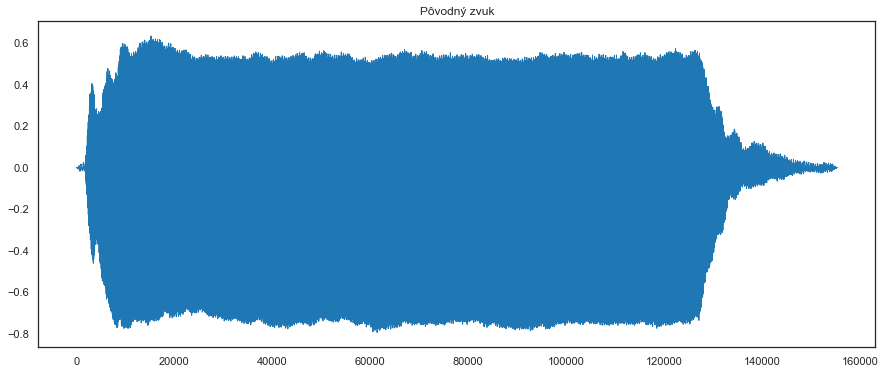

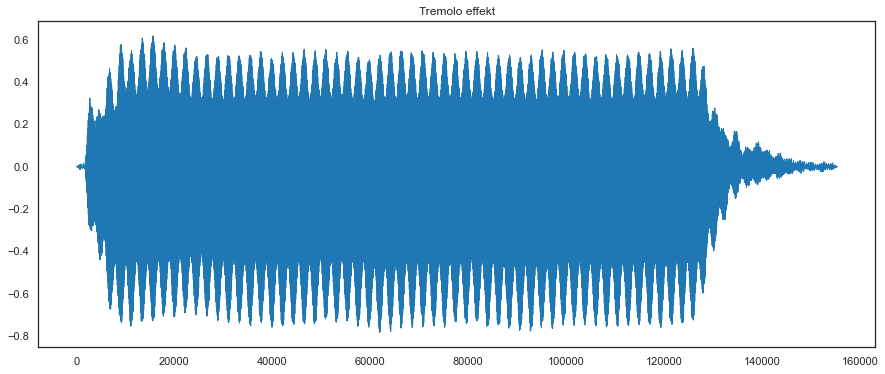

In [8]:
pd.Series(x).plot(figsize=(15,6),
                lw=1,
                title='Pôvodný zvuk',
               color=color_pal[0])
plt.show()
pd.Series(y).plot(figsize=(15,6),
                lw=1,
                title='Tremolo effekt',
               color=color_pal[0])
plt.show()

Efektom, ktorý sa prekrýva so zvukom, je amplitúdová modulácia. Keď sa vykoná tento kód, pôvodný zvukový signál x sa moduluje pomocou sinusového modulačného signálu W. Hĺbka modulácie je určená parametrom m. Výsledkom je nový zvukový signál y, ktorý obsahuje modulačné informácie.